In [1]:
import pandas as pd
import numpy as np

In [2]:
from helper_classes.DatabaseHelper import get_evaluation_score

Evaluation Metrics:
 1. **metrics**
		 - Precision: What proportion of positive identifications was actually correct?
		 - Recall: What proportion of actual positives was identified correctly?
		 - Mrr: Measure to evaluate systems that return a ranked list of answers to queries
 3. **model_name:** Name of the recommendation model. 
 4. **given_k:** Number of items user will has in her/his profile
 5. **look_ahead:** Ground Truth top_n => Number of items to consider for
 6. **prediction step:** How many steps will be taken after the evaluation.


In [3]:
user_scores = get_evaluation_score('i2v')

In [11]:
df_user_scores = pd.DataFrame(user_scores, columns=['user_id', 'avg_precision', 'avg_recall', 'avg_mrr'])
df_user_scores['user_id'] = df_user_scores['user_id'].astype(int)
df_user_scores['avg_precision'] = df_user_scores['avg_precision'].astype(float)
df_user_scores['avg_recall'] = df_user_scores['avg_recall'].astype(float)
df_user_scores['avg_mrr'] = df_user_scores['avg_mrr'].astype(float)

df_user_scores['avg_precision'] = df_user_scores['avg_precision'] / 100
df_user_scores['avg_recall'] = df_user_scores['avg_recall']  / 100
df_user_scores['avg_mrr'] = df_user_scores['avg_mrr'] / 100

df_user_scores.head()

,user_id,avg_precision,avg_recall,avg_mrr
0,3386196,0.314286,0.830612,0.560884
1,3374824,0.308696,0.325656,0.380918
2,3392508,0.283333,0.722222,0.384921
3,3385420,0.266667,0.827778,0.555556
4,3338456,0.260000,0.850000,0.550000


In [12]:
distinct_user_count = len(df_user_scores)
print('Number of the unique user count: ', distinct_user_count)

Number of the unique user count:  3605


Get the number of 'hits'

In [13]:
hit_counter = np.count_nonzero(df_user_scores['avg_precision'])
not_hit_counter = distinct_user_count - hit_counter
print(hit_counter)

1265


In [14]:
import seaborn as sns

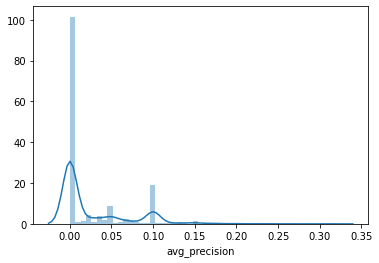

In [15]:
sns.distplot(df_user_scores['avg_precision'])

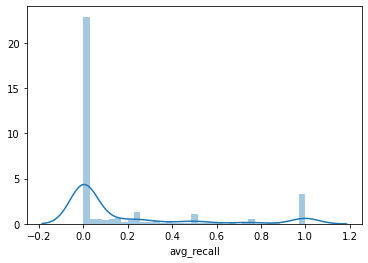

In [16]:
sns.distplot(df_user_scores['avg_recall'])

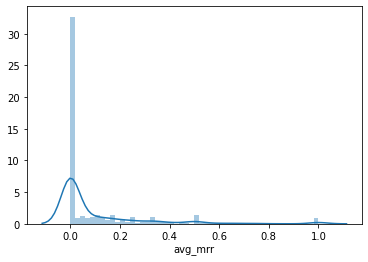

In [17]:
sns.distplot(df_user_scores['avg_mrr'])

In [18]:
def test(row):
    if (row.avg_precision > 0) and (row.avg_recall > 0) and (row.avg_mrr > 0):
        return 1
    else:
        return 0

In [19]:
df_user_scores['hit'] = df_user_scores.apply(test, axis=1)

In [20]:
df_user_scores.head()

,user_id,avg_precision,avg_recall,avg_mrr,hit
0,3386196,0.314286,0.830612,0.560884,1
1,3374824,0.308696,0.325656,0.380918,1
2,3392508,0.283333,0.722222,0.384921,1
3,3385420,0.266667,0.827778,0.555556,1
4,3338456,0.260000,0.850000,0.550000,1


In [21]:
number_of_hits = len(df_user_scores[df_user_scores['hit'] == 1])
print('Number of hits: ', number_of_hits)

Number of hits:  1265


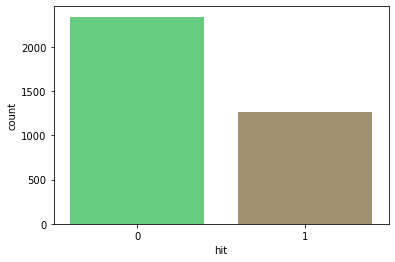

In [22]:
sns.countplot(x='hit',data=df_user_scores, palette='terrain')

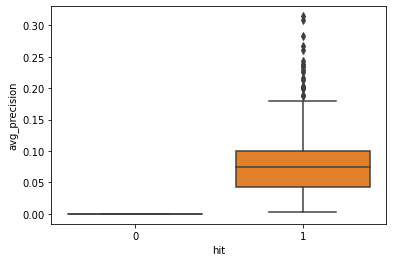

In [23]:
sns.boxplot(x='hit', y='avg_precision', data=df_user_scores)

In [24]:
df_user_scores.drop(columns=['user_id'], inplace=True)
df_user_scores.drop(columns=['hit'], inplace=True)

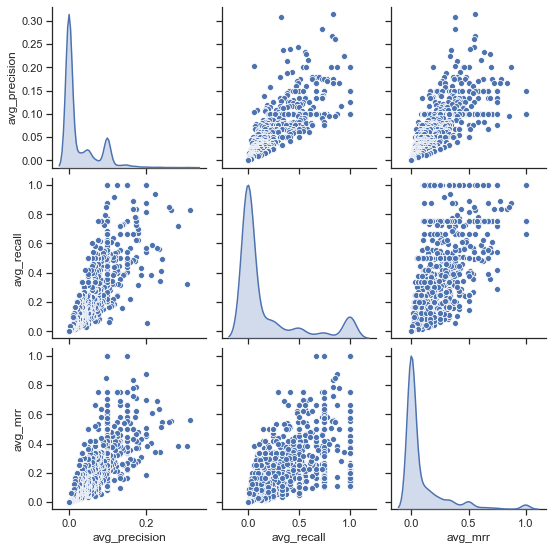

In [25]:
import seaborn as sns; sns.set(style="ticks", color_codes=True)
sns.pairplot(df_user_scores, diag_kind="kde")